## *<center><b>Practical Lab 5</b></center>*

#### *Multivariate Regression, Non-Parametric Models and Cross-Validation*

##### *Goal: Exploring Multivariate Regression Using Polynomial, Decision Trees and kNN, to optimize a model for predicting diabetes disease progression.*

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

### *Exploratory Data Analysis*

                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

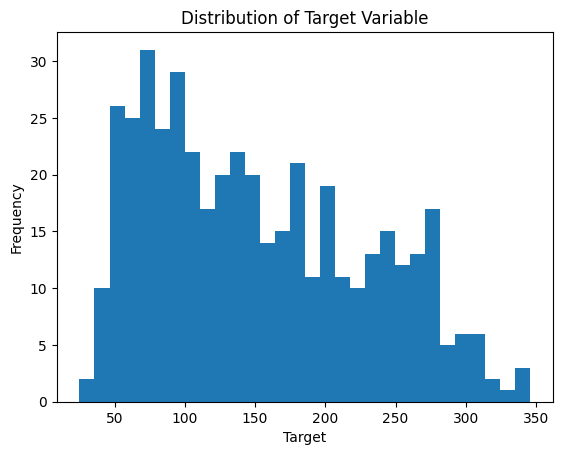

In [3]:
# Summary statistics
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Distribution of target variable
plt.hist(df['target'], bins=30)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

In [14]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### *Performing cross-validation*

In [5]:
# Models to evaluate
models = [
    ("Polynomial Regression (degree=2)", make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())),
    ("Polynomial Regression (degree=3)", make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearRegression())),
    ("Decision Tree (max_depth=5)", DecisionTreeRegressor(max_depth=5)),
    ("Decision Tree (max_depth=10)", DecisionTreeRegressor(max_depth=10)),
    ("kNN (k=5)", KNeighborsRegressor(n_neighbors=5)),
    ("kNN (k=10)", KNeighborsRegressor(n_neighbors=10))
]

# Results storage
results = []

In [7]:
# Cross-Validation
results = []
for name, model in models:
    cv_scores = cross_validate(model, X_train, y_train, scoring=('r2', 'neg_mean_absolute_error'), cv=5)
    mape_scores = np.abs((cv_scores['test_neg_mean_absolute_error'] / y_train.mean()) * 100)
    results.append((name, cv_scores['test_r2'].mean(), cv_scores['test_r2'].std(), -cv_scores['test_neg_mean_absolute_error'].mean(), cv_scores['test_neg_mean_absolute_error'].std(), mape_scores.mean(), mape_scores.std()))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'R-Squared (Mean)', 'R-Squared (Std)', 'MAE (Mean)', 'MAE (Std)', 'MAPE (Mean)', 'MAPE (Std)'])
print(results_df)

                              Model  R-Squared (Mean)  R-Squared (Std)   
0  Polynomial Regression (degree=2)          0.301238         0.140777  \
1  Polynomial Regression (degree=3)      -1067.828071       713.175996   
2       Decision Tree (max_depth=5)          0.207832         0.202818   
3      Decision Tree (max_depth=10)         -0.086651         0.217251   
4                         kNN (k=5)          0.317221         0.104040   
5                        kNN (k=10)          0.370056         0.108183   

   MAE (Mean)   MAE (Std)  MAPE (Mean)  MAPE (Std)  
0   50.762927    3.607252    33.019427    2.346385  
1  955.560833  230.100431   621.557379  149.671916  
2   53.457174    3.249333    34.771937    2.113572  
3   61.835170    1.516315    40.221517    0.986307  
4   50.199461    2.613718    32.652914    1.700128  
5   48.313501    2.866698    31.426166    1.864682  


### *Identifying the best model*

In [11]:
# Fit the best model on the entire training data
best_model = DecisionTreeRegressor(max_depth=10)
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
print("Test R-Squared:", r2)
print("Test MAPE:", mape)
print("Test MAE:", mae)

Test R-Squared: 0.1184572601797571
Test MAPE: 45.352405218187556
Test MAE: 54.366887980932916


#### *Graph with the datapoints (train+validation and test), and the fitted model*

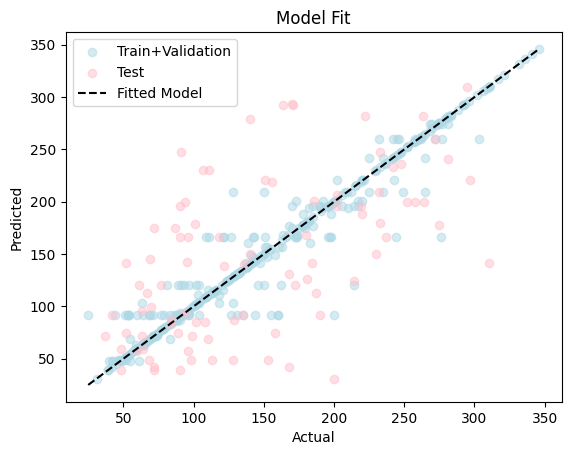

In [13]:
# Plotting
plt.scatter(y_train, best_model.predict(X_train), label='Train+Validation', color='lightblue', alpha=0.5)
plt.scatter(y_test, y_pred, label='Test', color='pink', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='black', label='Fitted Model')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Model Fit')
plt.show()


### *CONCLUSION*

##### *In this analysis, we explored various regression models to predict diabetes disease progression using the diabetes dataset. After evaluating the models using cross-validation, we identified the decision tree regressor with a maximum depth of 10 as the best-performing model based on the mean R-squared and mean absolute error (MAE) on the training data.*

##### *Model Limitations*
##### *Despite the promising performance, the model has some limitations that should be considered:*

##### *Overfitting: Decision tree models are prone to overfitting, especially when the maximum depth is high. While the model performed well on the training data, it may not generalize well to unseen data.*
##### *Sensitivity to Hyperparameters: Decision trees are sensitive to hyperparameters such as maximum depth, which can significantly impact model performance. The chosen hyperparameters may not be optimal for all datasets.*
##### *Limited Interpretability: Although decision trees are easy to interpret compared to some other models, the complex structure of deeper trees can make interpretation challenging. Understanding the underlying decision rules becomes more difficult as the tree depth increases.*

##### *Deep Dive on Model Failures*
##### *One area where the model may fail is in capturing complex nonlinear relationships between features and the target variable. While polynomial regression attempts to address this issue by introducing higher-order polynomial terms, it may still struggle to capture intricate patterns present in the data. Additionally, decision tree models may fail to generalize well to unseen data if they overfit to noise or outliers in the training data. This could lead to poor performance on the test set, particularly if the test data contains different patterns or distributions than the training data.*

##### *In conclusion, while the decision tree regressor with a maximum depth of 10 shows promise in predicting diabetes disease progression, it is essential to acknowledge its limitations and potential areas of failure. Further refinement of the model and exploration of alternative algorithms may be necessary to improve performance and robustness.*